In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from netCDF4 import Dataset
import xarray as xr
from cartopy.feature import NaturalEarthFeature
import warnings
import os
import sys

warnings.filterwarnings("ignore")

%matplotlib inline

# Options to print figures into notebook/increase size
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

# An option to keep numpy from printing in scientific notation by default:
np.set_printoptions(suppress=True)

In [2]:
def get_product(file_list, data_field, multiplier, color_range, current_folder):
    data_list, lat_list, long_list = [], [], []
    for file in file_list:
        fname='C:\\Users\\Ryan\\Desktop\\NOAA Projects\\NOAA Python Project\\Python Test\\Test\\' + current_folder + '\\' + file
        file_id = Dataset(fname)
    #     tester = file_id.groups['PRODUCT'].variables.keys()
    #     print(tester)
        data = file_id.groups['PRODUCT'].variables[data_field][:,:]
        print(type(data))
        #print(pd.DataFrame(data[0]))
        #print(pd.DataFrame(file_id.groups['PRODUCT'].variables['latitude'][:,:][0]))
        lat = pd.DataFrame(file_id.groups['PRODUCT'].variables['latitude'][:,:][0])
        #print(pd.DataFrame(file_id.groups['PRODUCT'].variables['longitude'][:,:][0]))
        long = pd.DataFrame(file_id.groups['PRODUCT'].variables['longitude'][:,:][0])
        #print(long.shape)
        lat_break = lat.stack()[(lat.stack() > -92) & (lat.stack() < -59)]
        #long = long.stack()[(long.stack() > 30) & (long.stack() < 51)]
        #print(lat.to_frame())
        #print(long.to_frame())
        #sys.exit(0)
#         print(lat.index.get_level_values(0).max())
#         print(lat.index.get_level_values(0).min())
#         print(lat.index.get_level_values(1).max())
#         print(lat.index.get_level_values(1).min())
        max_y = lat_break.index.get_level_values(0).max()
        min_y = lat_break.index.get_level_values(0).min()
        max_x = lat_break.index.get_level_values(1).max()
        min_x = lat_break.index.get_level_values(1).min()
        #max_lat = max(lat.index.get_level_values(0).max(), lat.index.get_level_values(1).max())
        #min_lat = min(lat.index.get_level_values(0).min(), lat.index.get_level_values(1).min())
#         print(' ')
#         print(long.index.get_level_values(0).max())
#         print(long.index.get_level_values(0).min())
#         print(long.index.get_level_values(1).max())
#         print(long.index.get_level_values(1).min())
#         max_lat = max(long.index.get_level_values(0).max(), long.index.get_level_values(1).max())
#         min_lat = min(long.index.get_level_values(0).min(), long.index.get_level_values(1).min())
        
        #sys.exit(0)
        data = pd.DataFrame(data[0])
        print(min_y)
        print(max_y)
        
        
        print(min_x)
        print(max_x)
        data = data.iloc[min_y:max_y]
        data = data.iloc[:,min_x:max_x]
        lat = lat.iloc[min_y:max_y]
        lat = lat.iloc[:,min_x:max_x]
        long = long.iloc[min_y:max_y]
        long = long.iloc[:,min_x:max_x]
        data = np.ma.core.MaskedArray(data)
        lat = np.ma.core.MaskedArray(lat)
        long = np.ma.core.MaskedArray(long)
        
        
        
        

        xmin,xmax,ymin,ymax = -92, -59, 30, 51
        data_list.append(data * multiplier)
        #lat_list.append(file_id.groups['PRODUCT'].variables['latitude'][:,:])
        #long_list.append(file_id.groups['PRODUCT'].variables['longitude'][:,:])
        lat_list.append(lat)
        long_list.append(long)
       
    levs = np.arange(color_range[0], color_range[1], color_range[2])
    return long_list, lat_list, data_list, levs, data_field

In [28]:
def plt_map(long_list, lat_list, data_list, levs, data_field, colorbar_label, current_folder):
    # Using cartopy, create the map projection and plot the data
    to_proj=ccrs.PlateCarree()
    ax = plt.axes(projection=to_proj)
    
    #projection=to_proj
    ax.coastlines('50m')
    ax.gridlines(draw_labels=True, linewidth=.5, color='grey', linestyle='--')
    ax.xlabels_top = False
    ax.ylabels_left = False
    states = NaturalEarthFeature(category="cultural", scale="50m",
                                 facecolor="none",
                                 name="admin_1_states_provinces_shp")
    ax.add_feature(states, linewidth=.5, edgecolor="black")# Can change color scheme using the get_cmap command
    for i, n in enumerate(data_list):
        x1 = plt.contourf(long_list[i], lat_list[i], data_list[i], levs, transform=to_proj, cmap=plt.get_cmap("rainbow"))
    
    plt.colorbar(x1, orientation="horizontal", fraction=0.05).set_label(colorbar_label)

    # The 4 corners from the 3 km WRF domain are (latitude, longitude) = 
    # (31.612877, -87.34198), (31.612877, -64.65802), (50.870567, -91.42612) 
    # and (50.870567, -60.573883).
    xmin,xmax,ymin,ymax = -92, -59, 30, 51
    xmin,xmax,ymin,ymax = -100, 0, -100, -25
    plt.axis([xmin,xmax,ymin,ymax])
    plt.title(current_folder + ' ' + data_field.replace('_', ' ').title(), y=1.1)
    output_figure = plt.gcf()
    plt.show()
    output_figure.savefig('C:\\Users\\Ryan\\Desktop\\NOAA Projects\\NOAA Python Project\\Python Test\\End Product\\' + current_folder + ' ' + data_field.replace('_', ' ').title() + '.png')

In [29]:
def run_program(file_list, data_field, multiplier, color_range, colorbar_label, current_folder):
    long_list, lat_list, data_list, levs, data_field = get_product(file_list, data_field, multiplier, color_range, current_folder)
    plt_map(long_list, lat_list, data_list, levs, data_field, colorbar_label, current_folder)

<class 'numpy.ma.core.MaskedArray'>
0
308
0
449
<class 'numpy.ma.core.MaskedArray'>
0
309
0
449


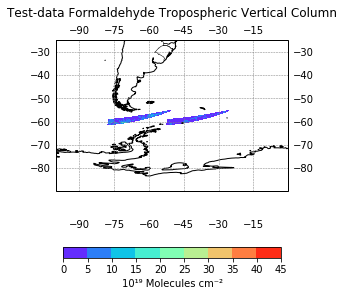

In [30]:
for folder_name in os.listdir('C:\\Users\\Ryan\\Desktop\\NOAA Projects\\NOAA Python Project\\Python Test\\Test\\'):
    if '-' in  folder_name:
        current_folder = folder_name
        aer_list, co_list, hcho_list, no2_list = [], [], [], []
        for x in os.listdir('C:\\Users\\Ryan\\Desktop\\NOAA Projects\\NOAA Python Project\\Python Test\\Test\\' + current_folder + '\\'):
            name = x.lower()
            if 'aer' in name:
                aer_list.append(x)
            elif 'co' in name:
                co_list.append(x)
            elif 'hcho' in name:
                hcho_list.append(x)
            elif 'no2' in name:
                no2_list.append(x)
        if aer_list:
            pass
            data_field = 'aerosol_index_354_388'
            multiplier = 1
            color_range = [0, 4.5, .5]
            colorbar_label = 'Aerosol Index'
            run_program(aer_list, data_field, multiplier, color_range, colorbar_label, current_folder)
            data_field = 'aerosol_index_340_380'
            run_program(aer_list, data_field, multiplier, color_range, colorbar_label, current_folder)
        if co_list:
            pass
            data_field = 'carbonmonoxide_total_column'
            multiplier = 60.22141
            color_range = [0, 3.5, .5]
            colorbar_label = '10¹⁸ Molecules cm⁻²'
            run_program(co_list, data_field, multiplier, color_range, colorbar_label, current_folder)      
        if hcho_list:
            pass
            data_field = 'formaldehyde_tropospheric_vertical_column'
            multiplier = 6.022141 * 2241.15
            color_range = [0, 50, 5]
            colorbar_label = '10¹⁹ Molecules cm⁻²'
            run_program(hcho_list, data_field, multiplier, color_range, colorbar_label, current_folder)
        if no2_list:
            data_field = 'nitrogendioxide_tropospheric_column'
            multiplier = 60221.41
            color_range = [0, 10, 1]
            colorbar_label = '10¹⁵ Molecules cm⁻²'
            run_program(no2_list, data_field, multiplier, color_range, colorbar_label, current_folder)


In [12]:
# aerosol_index_354_388, aerosol_index_340_380, nitrogendioxide_tropospheric_column, formaldehyde_tropospheric_vertical_column, carbonmonoxide_total_column 